Data Science Project: Planning Stage (Individual) 51913523

(1) Data Description:

For dataset "players.csv".

Each row in a dataset represents a single observation.

Number of Observations (Rows): 196.  Number of Variables (Columns): 9.

Name and type of variables: 1) "experience", shows player's level of experience (e.g., Pro, Veteran)  Data type：character.

2)"subscribe",shows whether the player is a subscriber.(True/False) Data type: logical.

3)"hashedEmail"	This is the encrypted representation of the player's email to aviod exposing important personal information. Data type: character.

4)"played_hours", represents total hours the player has spent playing. Data type:double

5)"name", represents the name of the player. Data type: character.

6)"gender", represents player's gender (e.g., Male, Female). Data type: character.

7)"age", represents player's age. Data type: double.

Potential issues(directly):

There are missing values in individualId and organizationName fields. 

The "name" data might contain same player name.

The "hashedEmail" data does not directly contribute to analysis and might need to be removed to help modeling.

potential issues that cannot directly see:

The definition of "experience" categories (e.g., Pro, Veteran) might need more clarification. For example: which level of experience can be categorized as "Pro"? 

For data "subscribe": We need to clarify the meaning of it in the context of the dataset.

For data "played_hours",there might be outliers (e.g., extremely high values, or zero hrs played), these could bring deviation to results.

How the data were collected:

Data such as played_hours and subscribe could be collected automatically from the game. Name, gender, and age might have been collected when users registered their accounts. Data like experience level might be self-reported through a survey.



(2) Question:
Our group chose question 1 as general question. 

To be more specfic, we want to know whether players with higher experience levels (e.g., Pro or Veteran) and subscription status (subscripted) contributes more data to our project or not?

(3) Exploratory Data Analysis and Visualization

Load the data to R:

In [13]:
library(tidyverse)
players <- read_csv("players.csv")
players
sessions <- read_csv("sessions.csv")
sessions

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,NA,NA
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,NA,NA
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,NA,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


For furthur operations, we can remove columns empty and does not directly contribute to analysis. This is the minimum necessary wrangling needed:

In [4]:
tidy_players <- players |>
select(-c(individualId, organizationName, hashedEmail))

tidy_players

experience,subscribe,played_hours,name,gender,age
<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,30.3,Morgan,Male,9
Veteran,TRUE,3.8,Christian,Male,17
Veteran,FALSE,0.0,Blake,Male,17
Amateur,TRUE,0.7,Flora,Female,21
Regular,TRUE,0.1,Kylie,Male,21
Amateur,TRUE,0.0,Adrian,Female,17
Regular,TRUE,0.0,Luna,Female,19
Amateur,FALSE,0.0,Emerson,Male,21
Amateur,TRUE,0.1,Natalie,Male,17


We can try some exploratory visualizations of the data:

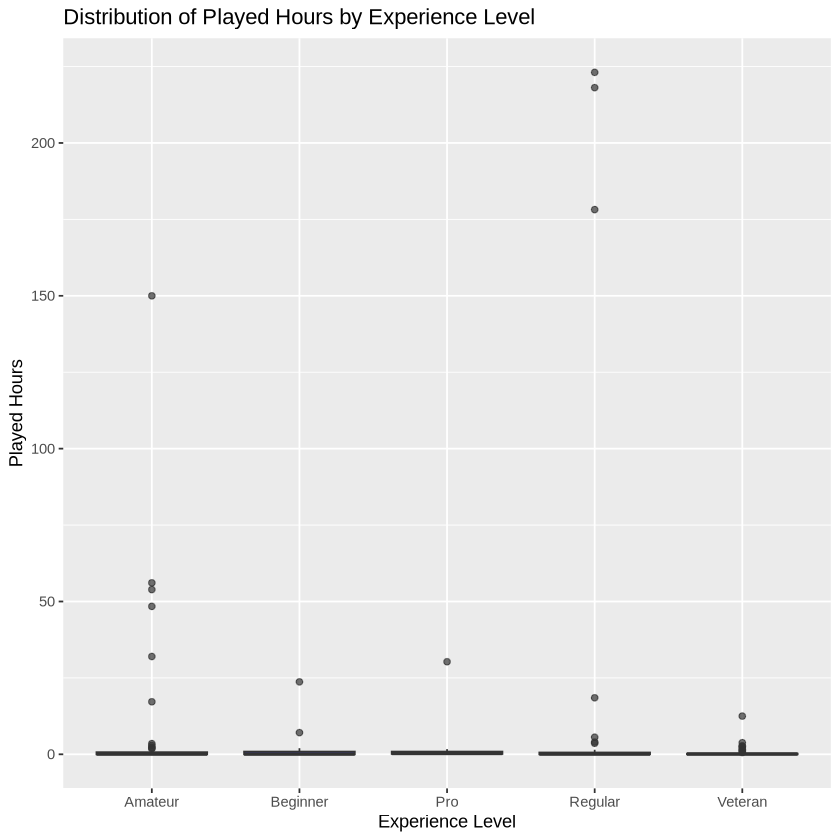

In [6]:
library(ggplot2)

ggplot(tidy_players, aes(x = experience, y = played_hours)) +
  geom_boxplot(fill = "blue", alpha = 0.7) +
  labs(title = "Distribution of Played Hours by Experience Level",
    x = "Experience Level",
    y = "Played Hours") 


The majority of players have small number of hours played across all experience levels, but there are some outliers as shown. This is relevant to our question of interest.

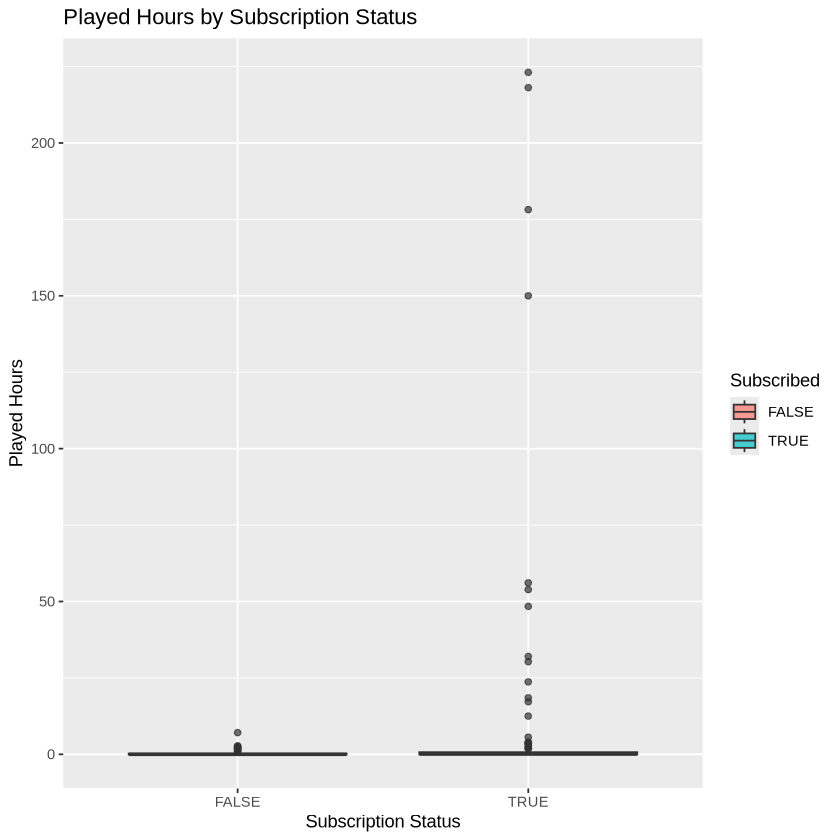

In [12]:
ggplot(tidy_players, aes(x = factor(subscribe), y = played_hours, fill = factor(subscribe))) +
  geom_boxplot(alpha = 0.7) +
  labs(
    title = "Played Hours by Subscription Status",
    x = "Subscription Status",
    y = "Played Hours",
    fill = "Subscribed")

Players who are subscribers tend to have a wider range of played hours, with several outliers showing a very large amount of  gameplay. 

(4) Methods and Plan:
For my question, I want to use Classification k-NN. For this method, we need to first convert "played_hours" into categories ("high game engagement" or "low game engagement"). We should set a range of value for each category. Then, we can use nromal classification model to predcit whether a player belongs to the category based on variables like experience, subscribe and etc. The advantage of this method is that the method is easy to understand.From the result, we can know directly whether the player contributes a large amount time to the game or not. Classification model helps reduce the complexity of modeling. But, on the other hand, convenience brings sacrifice in accuracy, the exact number of hours is not modeled. Subtle difference in the model are ignored. Also, problems might emerge when defining boundaries. We need to come to a common boundary of c"high" and "low" engagement, this process can introduce bias.

To compare and select the model, we can first create a Train and Test split, then train and compare performance across metrics
For my method, we do need to split. The split is done after the dataset is tidy and features are scaled. The training set is used to fit the k-NN model, and the testing set is used to evaluate model performance. K-fold cross-validation on the training set can be used to evaluate our model stability.